Shireeshma Parepalli

In [1]:
#Load Libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
from numpy.linalg import pinv
import matplotlib.pyplot as plot
from statistics import mean
from numpy.polynomial.polynomial import polyfit
import numpy
import scipy.linalg as slin
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
#Load Data
dfversion1= pd.read_csv('C:/Users/13017/Desktop/604/project2/nslkdd-version1.csv')
dfversion2= pd.read_csv('C:/Users/13017/Desktop/604/project2/nslkdd-version2.csv')

## Summarize the Data

In [3]:
#Dataset Dimensions
print("Number of observations and attributes in nslkdd-version1",dfversion1.shape)
print("Number of observations and attributes in nslkdd-version1",dfversion2.shape)

Number of observations and attributes in nslkdd-version1 (25192, 42)
Number of observations and attributes in nslkdd-version1 (25192, 36)


## Peeking at the Data

In [4]:
dfversion1.head()

a1   a2        a3  a4   a5    a6  a7  a8  a9  a10  ...  a33   a34   a35  \
0   0  tcp  ftp_data  SF  491     0   0   0   0    0  ...   25  0.17  0.03   
1   0  udp     other  SF  146     0   0   0   0    0  ...    1  0.00  0.60   
2   0  tcp   private  S0    0     0   0   0   0    0  ...   26  0.10  0.05   
3   0  tcp      http  SF  232  8153   0   0   0    0  ...  255  1.00  0.00   
4   0  tcp      http  SF  199   420   0   0   0    0  ...  255  1.00  0.00   

    a36   a37   a38   a39   a40   a41      a42  
0  0.17  0.00  0.00  0.00  0.05  0.00   normal  
1  0.88  0.00  0.00  0.00  0.00  0.00   normal  
2  0.00  0.00  1.00  1.00  0.00  0.00  neptune  
3  0.03  0.04  0.03  0.01  0.00  0.01   normal  
4  0.00  0.00  0.00  0.00  0.00  0.00   normal  

[5 rows x 42 columns]

In [5]:
dfversion1.tail()

a1   a2        a3    a4   a5  a6  a7  a8  a9  a10  ...  a33   a34  \
25187   0  tcp      exec  RSTO    0   0   0   0   0    0  ...    7  0.03   
25188   0  tcp  ftp_data    SF  334   0   0   0   0    0  ...   39  1.00   
25189   0  tcp   private   REJ    0   0   0   0   0    0  ...   13  0.05   
25190   0  tcp      nnsp    S0    0   0   0   0   0    0  ...   20  0.08   
25191   0  tcp    finger    S0    0   0   0   0   0    0  ...   49  0.19   

        a35   a36   a37  a38  a39  a40  a41          a42  
25187  0.06  0.00  0.00  0.0  0.0  1.0  1.0      neptune  
25188  0.00  1.00  0.18  0.0  0.0  0.0  0.0  warezclient  
25189  0.07  0.00  0.00  0.0  0.0  1.0  1.0      neptune  
25190  0.06  0.00  0.00  1.0  1.0  0.0  0.0      neptune  
25191  0.03  0.01  0.00  1.0  1.0  0.0  0.0      neptune  

[5 rows x 42 columns]

In [6]:
dfversion2.head()

a7  a8  a9  a10  a11  a12  a13  a14  a15  a16  ...  a33   a34   a35   a36  \
0   0   0   0    0    0    0    0    0    0    0  ...   25  0.17  0.03  0.17   
1   0   0   0    0    0    0    0    0    0    0  ...    1  0.00  0.60  0.88   
2   0   0   0    0    0    0    0    0    0    0  ...   26  0.10  0.05  0.00   
3   0   0   0    0    0    0    0    1    0    0  ...  255  1.00  0.00  0.03   
4   0   0   0    0    0    0    0    1    0    0  ...  255  1.00  0.00  0.00   

    a37   a38   a39   a40   a41  a42  
0  0.00  0.00  0.00  0.05  0.00    0  
1  0.00  0.00  0.00  0.00  0.00    0  
2  0.00  1.00  1.00  0.00  0.00    1  
3  0.04  0.03  0.01  0.00  0.01    0  
4  0.00  0.00  0.00  0.00  0.00    0  

[5 rows x 36 columns]

In [7]:
dfversion2.tail()

a7  a8  a9  a10  a11  a12  a13  a14  a15  a16  ...  a33   a34   a35  \
25187   0   0   0    0    0    0    0    0    0    0  ...    7  0.03  0.06   
25188   0   0   0    0    0    0    0    1    0    0  ...   39  1.00  0.00   
25189   0   0   0    0    0    0    0    0    0    0  ...   13  0.05  0.07   
25190   0   0   0    0    0    0    0    0    0    0  ...   20  0.08  0.06   
25191   0   0   0    0    0    0    0    0    0    0  ...   49  0.19  0.03   

        a36   a37  a38  a39  a40  a41  a42  
25187  0.00  0.00  0.0  0.0  1.0  1.0    1  
25188  1.00  0.18  0.0  0.0  0.0  0.0    3  
25189  0.00  0.00  0.0  0.0  1.0  1.0    1  
25190  0.00  0.00  1.0  1.0  0.0  0.0    1  
25191  0.01  0.00  1.0  1.0  0.0  0.0    1  

[5 rows x 36 columns]

In [8]:
dfversion1.isnull().sum()

a1     0
a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
a17    0
a18    0
a19    0
a20    0
a21    0
a22    0
a23    0
a24    0
a25    0
a26    0
a27    0
a28    0
a29    0
a30    0
a31    0
a32    0
a33    0
a34    0
a35    0
a36    0
a37    0
a38    0
a39    0
a40    0
a41    0
a42    0
dtype: int64

In [9]:
dfversion2.isnull().sum()

a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
a17    0
a18    0
a19    0
a20    0
a21    0
a22    0
a23    0
a24    0
a25    0
a26    0
a27    0
a28    0
a29    0
a30    0
a31    0
a32    0
a33    0
a34    0
a35    0
a36    0
a37    0
a38    0
a39    0
a40    0
a41    0
a42    0
dtype: int64

## Statistical Summary

In [10]:
dfversion1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
a1     25192 non-null int64
a2     25192 non-null object
a3     25192 non-null object
a4     25192 non-null object
a5     25192 non-null int64
a6     25192 non-null int64
a7     25192 non-null int64
a8     25192 non-null int64
a9     25192 non-null int64
a10    25192 non-null int64
a11    25192 non-null int64
a12    25192 non-null int64
a13    25192 non-null int64
a14    25192 non-null int64
a15    25192 non-null int64
a16    25192 non-null int64
a17    25192 non-null int64
a18    25192 non-null int64
a19    25192 non-null int64
a20    25192 non-null int64
a21    25192 non-null int64
a22    25192 non-null int64
a23    25192 non-null int64
a24    25192 non-null int64
a25    25192 non-null float64
a26    25192 non-null float64
a27    25192 non-null float64
a28    25192 non-null float64
a29    25192 non-null float64
a30    25192 non-null float64
a31    25192 non-null float64
a32   

In [11]:
dfversion2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 36 columns):
a7     25192 non-null int64
a8     25192 non-null int64
a9     25192 non-null int64
a10    25192 non-null int64
a11    25192 non-null int64
a12    25192 non-null int64
a13    25192 non-null int64
a14    25192 non-null int64
a15    25192 non-null int64
a16    25192 non-null int64
a17    25192 non-null int64
a18    25192 non-null int64
a19    25192 non-null int64
a20    25192 non-null int64
a21    25192 non-null int64
a22    25192 non-null int64
a23    25192 non-null int64
a24    25192 non-null int64
a25    25192 non-null float64
a26    25192 non-null float64
a27    25192 non-null float64
a28    25192 non-null float64
a29    25192 non-null float64
a30    25192 non-null float64
a31    25192 non-null float64
a32    25192 non-null int64
a33    25192 non-null int64
a34    25192 non-null float64
a35    25192 non-null float64
a36    25192 non-null float64
a37    25192 non-null float64
a

In [12]:
dfversion1.describe()

a1            a5            a6            a7            a8  \
count  25192.000000  2.519200e+04  2.519200e+04  25192.000000  25192.000000   
mean     305.054104  2.433063e+04  3.491847e+03      0.000079      0.023738   
std     2686.555640  2.410805e+06  8.883072e+04      0.008910      0.260221   
min        0.000000  0.000000e+00  0.000000e+00      0.000000      0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000      0.000000   
50%        0.000000  4.400000e+01  0.000000e+00      0.000000      0.000000   
75%        0.000000  2.790000e+02  5.302500e+02      0.000000      0.000000   
max    42862.000000  3.817091e+08  5.151385e+06      1.000000      3.000000   

                a9           a10           a11           a12           a13  \
count  25192.00000  25192.000000  25192.000000  25192.000000  25192.000000   
mean       0.00004      0.198039      0.001191      0.394768      0.227850   
std        0.00630      2.154202      0.045418      0.488811     10.417352   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        0.00000      0.000000      0.000000      0.000000      0.000000   
50%        0.00000      0.000000      0.000000      0.000000      0.000000   
75%        0.00000      0.000000      0.000000      1.000000      0.000000   
max        1.00000     77.000000      4.000000      1.000000    884.000000   

       ...           a32           a33           a34           a35  \
count  ...  25192.000000  25192.000000  25192.000000  25192.000000   
mean   ...    182.532074    115.063036      0.519791      0.082539   
std    ...     98.993895    110.646850      0.448944      0.187191   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     84.000000     10.000000      0.050000      0.000000   
50%    ...    255.000000     61.000000      0.510000      0.030000   
75%    ...    255.000000    255.000000      1.000000      0.070000   
max    ...    255.000000    255.000000      1.000000      1.000000   

                a36           a37           a38           a39           a40  \
count  25192.000000  25192.000000  25192.000000  25192.000000  25192.000000   
mean       0.147453      0.031844      0.285800      0.279846      0.117800   
std        0.308367      0.110575      0.445316      0.446075      0.305869   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.060000      0.020000      1.000000      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                a41  
count  25192.000000  
mean       0.118769  
std        0.317333  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 38 columns]

In [13]:
dfversion2.describe()

a7            a8            a9           a10          a11  \
count  25192.000000  25192.000000  25192.000000  25192.000000  25192.00000   
mean       0.000079      0.023738      0.000079      0.023738      0.00004   
std        0.008910      0.260221      0.008910      0.260221      0.00630   
min        0.000000      0.000000      0.000000      0.000000      0.00000   
25%        0.000000      0.000000      0.000000      0.000000      0.00000   
50%        0.000000      0.000000      0.000000      0.000000      0.00000   
75%        0.000000      0.000000      0.000000      0.000000      0.00000   
max        1.000000      3.000000      1.000000      3.000000      1.00000   

                a12           a13           a14           a15           a16  \
count  25192.000000  25192.000000  25192.000000  25192.000000  25192.000000   
mean       0.198039      0.001191      0.394768      0.227850      0.001548   
std        2.154202      0.045418      0.488811     10.417352      0.039316   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      0.000000      0.000000   
max       77.000000      4.000000      1.000000    884.000000      1.000000   

       ...           a33           a34           a35           a36  \
count  ...  25192.000000  25192.000000  25192.000000  25192.000000   
mean   ...    115.063036      0.519791      0.082539      0.147453   
std    ...    110.646850      0.448944      0.187191      0.308367   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     10.000000      0.050000      0.000000      0.000000   
50%    ...     61.000000      0.510000      0.030000      0.000000   
75%    ...    255.000000      1.000000      0.070000      0.060000   
max    ...    255.000000      1.000000      1.000000      1.000000   

                a37           a38           a39           a40           a41  \
count  25192.000000  25192.000000  25192.000000  25192.000000  25192.000000   
mean       0.031844      0.285800      0.279846      0.117800      0.118769   
std        0.110575      0.445316      0.446075      0.305869      0.317333   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.020000      1.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                a42  
count  25192.000000  
mean       1.171364  
std        2.222340  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max       21.000000  

[8 rows x 36 columns]

columns a2,a3,a4 & a42 are object type.


In [14]:
dfversion1['a2'].value_counts()

tcp     20526
udp      3011
icmp     1655
Name: a2, dtype: int64

In [15]:
dfversion1['a3'].value_counts()

http           8003
private        4351
domain_u       1820
smtp           1449
ftp_data       1396
eco_i           909
other           858
ecr_i           613
telnet          483
finger          366
ftp             345
auth            189
Z39_50          172
courier         164
uucp            157
time            155
bgp             146
whois           145
imap4           138
uucp_path       133
iso_tsap        131
ctf             127
urp_i           124
nnsp            123
supdup          114
http_443        113
csnet_ns        111
efs             110
gopher          109
domain          109
               ... 
exec             91
ldap             90
mtp              90
systat           88
link             85
netbios_dgm      85
login            79
netstat          78
netbios_ns       76
netbios_ssn      67
sunrpc           67
kshell           67
echo             65
nntp             61
ssh              58
pop_3            53
sql_net          46
IRC              40
ntp_u            32


In [16]:
dfversion1['a4'].value_counts()

SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
S2           21
RSTOS0       21
S3           15
OTH           5
Name: a4, dtype: int64

In [17]:
dfversion1['a42'].value_counts()

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
phf                    2
multihop               2
ftp_write              1
land                   1
loadmodule             1
spy                    1
Name: a42, dtype: int64

In [18]:
 df1  = dfversion1

## Label Encoding in Python

In [19]:
df1['a2'] = df1['a2'].astype('category')
df1['a2'] = df1['a2'].cat.codes

In [20]:
df1['a2'].value_counts()

1    20526
2     3011
0     1655
Name: a2, dtype: int64

In [21]:
df1['a3'] = df1['a3'].astype('category')
df1['a3'] = df1['a3'].cat.codes

In [22]:
df1['a3'].value_counts()

22    8003
46    4351
11    1820
51    1449
19    1396
13     909
41     858
14     613
57     483
17     366
18     345
3      189
2      172
5      164
62     157
59     155
4      146
65     145
25     138
63     133
26     131
7      127
61     124
38     123
55     114
23     113
6      111
15     110
10     109
20     109
      ... 
16      91
29      90
32      90
56      88
30      85
34      85
31      79
37      78
35      76
54      67
28      67
36      67
12      65
39      61
53      58
44      53
52      46
0       40
40      32
1       22
49      20
43      17
48      17
45      12
50      11
60       4
47       3
42       3
58       2
24       1
Name: a3, Length: 66, dtype: int64

In [23]:
df1['a4'] = df1['a4'].astype('category')
df1['a4'] = df1['a4'].cat.codes

In [24]:
df1['a4'].value_counts()

9     14973
5      7009
1      2216
4       497
2       304
6        88
10       43
7        21
3        21
8        15
0         5
Name: a4, dtype: int64

In [25]:
df1['a42'] = df1['a42'].astype('category')
df1['a42'] = df1['a42'].cat.codes

In [26]:
df1['a42'].value_counts()

11    13449
9      8282
5       710
16      691
14      587
17      529
10      301
0       196
19      188
20      181
13       38
3        10
21        7
1         6
4         5
15        4
8         2
12        2
7         1
6         1
18        1
2         1
Name: a42, dtype: int64

In [27]:
df1.to_csv('C:/Users/13017/Desktop/604/project2/df1.csv')

In [28]:
from sklearn.model_selection import train_test_split
X = df1.drop(['a42'],axis=1)
Y = np.asarray(df1['a42'], dtype="|S6")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state =42)

print('Training Features Shape:', X_test.shape)
print('Training Labels Shape:', Y_test.shape)
print('Testing Features Shape:', X_train.shape)
print('Testing Labels Shape:', Y_train.shape)

Training Features Shape: (7558, 41)
Training Labels Shape: (7558,)
Testing Features Shape: (17634, 41)
Testing Labels Shape: (17634,)


In [29]:
# List of features for later use
feature_list = list(X.columns)
feature_list
X = np.array(X)
Y = np.array(Y)

In [30]:
model=RandomForestClassifier(n_estimators=25, oob_score=True)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
print('Score:',model.score(X_train, Y_train))

Score: 0.9999432913689463


In [32]:
print('Score:',model.score(X_test,Y_test))

Score: 0.9962953162212226


In [33]:
# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: a5                   Importance: 0.12
Variable: a29                  Importance: 0.1
Variable: a23                  Importance: 0.07
Variable: a6                   Importance: 0.06
Variable: a26                  Importance: 0.06
Variable: a30                  Importance: 0.06
Variable: a4                   Importance: 0.05
Variable: a2                   Importance: 0.04
Variable: a33                  Importance: 0.04
Variable: a34                  Importance: 0.04
Variable: a38                  Importance: 0.04
Variable: a39                  Importance: 0.04
Variable: a25                  Importance: 0.03
Variable: a36                  Importance: 0.03
Variable: a37                  Importance: 0.03
Variable: a3                   Importance: 0.02
Variable: a24                  Importance: 0.02
Variable: a32                  Importance: 0.02
Variable: a35                  Importance: 0.02
Variable: a40                  Importance: 0.02
Variable: a8                   Importance

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

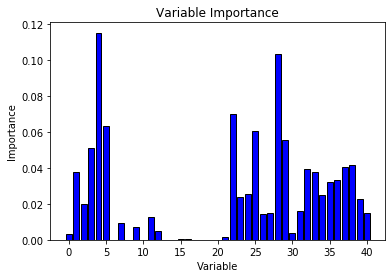

In [34]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'b', edgecolor = 'k', linewidth = 1.0)
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importance');

In [35]:
#print(clf.oob_score_)
ErrorRate = 1-model.oob_score_
ErrorRate

0.004139730066916147

In [36]:
# Make predictions on test data
y_predictions = model.predict(X_train)
print(metrics.confusion_matrix(Y_train, y_predictions))
print("Accuracy_Score =",metrics.accuracy_score(Y_train, y_predictions))

[[ 132    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0  221    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0 9407    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0   26    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0  417    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    4    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  497    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0  365    

In [37]:
y_predicted = model.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_predicted))
print("Accuracy_Score =",metrics.accuracy_score(Y_test, y_predicted))

[[  62    0    0    2    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    1    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0   79    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    1 4037    0    0    0    2    0    0    0    2    0    0
     0    0    0    0]
 [   0    0    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0   12    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    2    0    0  168    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    6    0    0    1  187    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    1    0    0    0    0  163    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_predicted)
cm

array([[  62,    0,    0,    2,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   0,    1,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   0,    0,   79,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1, 4037,    0,    0,    0,    2,    0,    0,    0,
           2,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,   12,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    2,    0,    0,  168,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    6,    0,    0,    1,  187,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],


Text(0.5, 42.0, 'Truth')

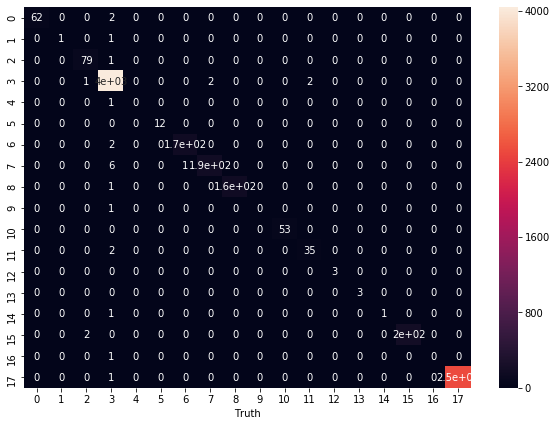

In [39]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.xlabel("Truth")

In [40]:
##Classification report
from sklearn.metrics import classification_report
target_names=[]
print(classification_report(Y_train,y_predictions))

              precision    recall  f1-score   support

        b'0'       1.00      1.00      1.00       132
        b'1'       1.00      1.00      1.00         4
       b'10'       1.00      1.00      1.00       221
       b'11'       1.00      1.00      1.00      9407
       b'12'       1.00      1.00      1.00         1
       b'13'       1.00      1.00      1.00        26
       b'14'       1.00      1.00      1.00       417
       b'15'       1.00      1.00      1.00         4
       b'16'       1.00      1.00      1.00       497
       b'17'       1.00      1.00      1.00       365
       b'19'       1.00      1.00      1.00       135
        b'2'       1.00      1.00      1.00         1
       b'20'       1.00      1.00      1.00       144
       b'21'       1.00      1.00      1.00         4
        b'3'       1.00      1.00      1.00         7
        b'4'       1.00      0.67      0.80         3
        b'5'       1.00      1.00      1.00       504
        b'6'       1.00    

In [41]:
target_names=[]
print(classification_report(Y_test, y_predicted))

              precision    recall  f1-score   support

        b'0'       1.00      0.97      0.98        64
        b'1'       1.00      0.50      0.67         2
       b'10'       0.96      0.99      0.98        80
       b'11'       1.00      1.00      1.00      4042
       b'12'       0.00      0.00      0.00         1
       b'13'       1.00      1.00      1.00        12
       b'14'       0.99      0.99      0.99       170
       b'16'       0.99      0.96      0.98       194
       b'17'       1.00      0.99      1.00       164
       b'18'       0.00      0.00      0.00         1
       b'19'       1.00      1.00      1.00        53
       b'20'       0.95      0.95      0.95        37
       b'21'       1.00      1.00      1.00         3
        b'3'       1.00      1.00      1.00         3
        b'4'       1.00      0.50      0.67         2
        b'5'       1.00      0.99      1.00       206
        b'7'       0.00      0.00      0.00         1
        b'9'       1.00    

In [42]:
from sklearn.model_selection import cross_val_score
# 10-Fold Cross validation
print(np.mean(cross_val_score(model, X_train, Y_train, cv=10)))
print(np.mean(cross_val_score(model, X_test, Y_test, cv=10)))

0.9960924838149383
0.9948562167061036
